In [126]:
from PIL import Image
import pytesseract
import cv2
import numpy as np

import pandas as pd

from matplotlib import pyplot as plt

#pytesseract.pytesseract.tesseract_cmd = r'D:\Dev\envs\py36\Library\bin\tesseract.exe'
#!tesseract --list-langs

In [127]:
text_from_image = pytesseract.image_to_string(Image.open('ticket_inter_20230222_crop.jpg'))
print(text_from_image)

Intermarché

SAS BEAUROCHAY

15 COURS DE L'ANCIENNE

BOULANGERTE
92130 ISSY LES MOULINEAUX
TEL : 01 46 62 49 80

NESTLE CHOCAPIC 750G 3,55 EUR A
NESTLE CHOCAPIC 750G 3,55 EUR A
NESTLE CHOCAPIC 750G 3,55 EUR A
CASSEGRAIN P.P CAROT pr,
JR HALOPAC 2TR.COEUR 2
3,

64 EUR A
CORAYA 10 BAT |LANGOU 50 EUR A
*xAXE DEO DARK TEMPTA 6,45 EUR B
ST ELOI CROUTONS NAT 1,07 EUR A
LIEBIG VEL 12LEG RED 2,60 EUR A
LIEBIG VEL 12LEG RED 2,60 EUR A
NIVEA DEMAQUILL YEUX 7

MONTANT DU
, a

CB SANS CONTACT 34,97, EUR




# OpenCV image preprocessing - contrast_optimizer.py

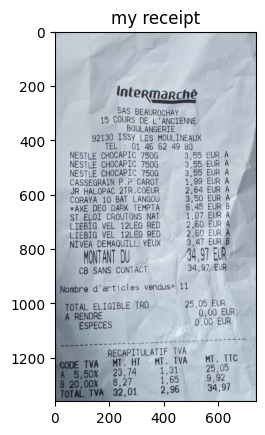

In [128]:
img = cv2.imread('ticket_inter_20230222_crop.jpg')

plt.imshow(img)
plt.title('my receipt')
plt.show()

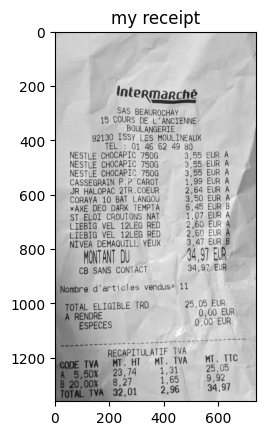

In [130]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #IMREAD_GRAYSCALE

plt.imshow(img_gray, cmap="gray")
plt.title('my receipt')
plt.show()

## Do not enlarge contrast by histogram equalization
maps the input pixels in brighter region to output pixels in full region

In [44]:
"""
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()
"""

"\nhist,bins = np.histogram(img.flatten(),256,[0,256])\ncdf = hist.cumsum()\ncdf_normalized = cdf * float(hist.max()) / cdf.max()\nplt.plot(cdf_normalized, color = 'b')\nplt.hist(img.flatten(),256,[0,256], color = 'r')\nplt.xlim([0,256])\nplt.legend(('cdf','histogram'), loc = 'upper left')\nplt.show()\n"

In [45]:
"""
equ = cv2.equalizeHist(img_gray)

plt.imshow(equ, cmap="gray")
plt.title('my receipt')
plt.show()
"""

'\nequ = cv2.equalizeHist(img_gray)\n\nplt.imshow(equ, cmap="gray")\nplt.title(\'my receipt\')\nplt.show()\n'

=> ewww

## Enlarge luminosity and contrast

### By Dynamic/adaptive threshold method

In [131]:
from skimage.filters import threshold_local

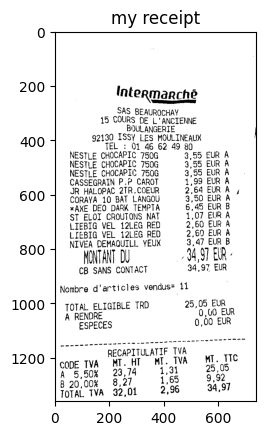

In [134]:
# Dynamic/adaptive Threshold, to grid-search
thresh = threshold_local(img_gray,
                         block_size=51,
                         method="gaussian",
                         offset=30)

img_contr = (img_gray > thresh).astype("uint8") * 255

plt.imshow(img_contr, cmap="gray")
plt.title('my receipt')
plt.show()

### By Increasing light contrast then dark contrast

In [48]:
#img_gray = cv2.cvtColor(img_gray, cv2.COLOR_GRAY2BGR)

In [49]:
def increase_light_contrast(im, value=30):
    """
    Takes an Image and a threshold value
    Return the processed Image, having light contrast enlarged
    based on https://stackoverflow.com/users/5629538/bill-grates 's answer
    """

    hsv = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)

    lim = 255 - value
    v[v > lim] = 255

    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img


def increase_dark_contrast(im, value=30):
    """
    Takes an Image and a threshold value
    Return the processed Image, having light contrast enlarged
    based on https://stackoverflow.com/users/5629538/bill-grates 's answer
    """
    
    hsv = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)

    lim = 255 - value
    v[v < lim] = 0

    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img

In [50]:
"""
img_light = increase_light_contrast(img_gray, value=130)

plt.imshow(img_light, cmap="gray")
plt.title('my receipt')
plt.show()

img_dark = increase_dark_contrast(img_light, value=100) #100

plt.imshow(img_dark, cmap="gray")
plt.title('my receipt')
plt.show()
"""

'\nimg_light = increase_light_contrast(img_gray, value=130)\n\nplt.imshow(img_light, cmap="gray")\nplt.title(\'my receipt\')\nplt.show()\n\nimg_dark = increase_dark_contrast(img_light, value=100) #100\n\nplt.imshow(img_dark, cmap="gray")\nplt.title(\'my receipt\')\nplt.show()\n'

### Test contrast method

In [51]:
# light than dark method
"""
text_from_image = pytesseract.image_to_string(
    Image.fromarray(img_dark)
)
print(text_from_image)
"""

'\ntext_from_image = pytesseract.image_to_string(\n    Image.fromarray(img_dark)\n)\nprint(text_from_image)\n'

In [135]:
# Adaptive method

text_from_image = pytesseract.image_to_string(
    Image.fromarray(img_contr)
)
print(text_from_image)

Intermarché

SAS BEAUROCHAY
45 COURS DE L*ANCIENNE
BOULANGERTE
92130 ISSY LES MOULINEAUX
TEL : 01 46 62 49 80
NESTLE CHOCAPIC 750G 3,55 EUR A
NESTLE CHOCAPIC 750G 3,55 EUR A
NESTLE CHOCAPIC 750G 3,55 EUR A

CASSEGRAIN P.P CAROT 1,99 EUR A
JR HALOPAC 2TR.COEUR 2,64 EURA ,
CORAYA 10 BAT LANGOU 3,50 EUR A
*xAXE DEO DARK TEMPTA 6,45 EUR B
ST ELOI CROUTONS NAT 1,07 EUR A
LIEBIG VEL 12LEG REO 2,60 EUR A
LIEBIG VEL 12LEG RED 2,60 EUR A
NIVEA TAN YEUX 3,47 TER
CB SANS CONTACT 34, 97, EUR

Nombre d’articles vendus= 11

TOTAL ELIGIBLE TRO 25,05 EUR
A RENDRE 0,00 EUR
ESPECES 0,00 EUR

RECAPITULATIF TVA
CODE TVA MI..HT MI. TVA MT. TIC
A 5,50% 23,74 1,31 25,05
B 20,00% 8,27 1,65 9,92
TOTAL TVA 32,01 2,96 34,97



=> Using Adaptive method gives better results than increasing light then dark contrast on the whole receipt

# Split text into product name and price 

In [262]:
[x for x in text_from_image.split("\n") if x != ""]

['Intermarché',
 'SAS BEAUROCHAY',
 '45 COURS DE L*ANCIENNE',
 'BOULANGERTE',
 '92130 ISSY LES MOULINEAUX',
 'TEL : 01 46 62 49 80',
 'NESTLE CHOCAPIC 750G 3,55 EUR A',
 'NESTLE CHOCAPIC 750G 3,55 EUR A',
 'NESTLE CHOCAPIC 750G 3,55 EUR A',
 'CASSEGRAIN P.P CAROT 1,99 EUR A',
 'JR HALOPAC 2TR.COEUR 2,64 EURA ,',
 'CORAYA 10 BAT LANGOU 3,50 EUR A',
 '*xAXE DEO DARK TEMPTA 6,45 EUR B',
 'ST ELOI CROUTONS NAT 1,07 EUR A',
 'LIEBIG VEL 12LEG REO 2,60 EUR A',
 'LIEBIG VEL 12LEG RED 2,60 EUR A',
 'NIVEA TAN YEUX 3,47 TER',
 'CB SANS CONTACT 34, 97, EUR',
 'Nombre d’articles vendus= 11',
 'TOTAL ELIGIBLE TRO 25,05 EUR',
 'A RENDRE 0,00 EUR',
 'ESPECES 0,00 EUR',
 'RECAPITULATIF TVA',
 'CODE TVA MI..HT MI. TVA MT. TIC',
 'A 5,50% 23,74 1,31 25,05',
 'B 20,00% 8,27 1,65 9,92',
 'TOTAL TVA 32,01 2,96 34,97']

In [225]:
import re

# to lowercase
# anihilate white spaces (multiple, tabs etc...)

text_from_image_norm = re.sub(' +', ' ', text_from_image.lower())
text_from_image_norm

'intermarché\n\nsas beaurochay\n45 cours de l*ancienne\nboulangerte\n92130 issy les moulineaux\ntel : 01 46 62 49 80\nnestle chocapic 750g 3,55 eur a\nnestle chocapic 750g 3,55 eur a\nnestle chocapic 750g 3,55 eur a\n\ncassegrain p.p carot 1,99 eur a\njr halopac 2tr.coeur 2,64 eura ,\ncoraya 10 bat langou 3,50 eur a\n*xaxe deo dark tempta 6,45 eur b\nst eloi croutons nat 1,07 eur a\nliebig vel 12leg reo 2,60 eur a\nliebig vel 12leg red 2,60 eur a\nnivea tan yeux 3,47 ter\ncb sans contact 34, 97, eur\n\nnombre d’articles vendus= 11\n\ntotal eligible tro 25,05 eur\na rendre 0,00 eur\nespeces 0,00 eur\n\nrecapitulatif tva\ncode tva mi..ht mi. tva mt. tic\na 5,50% 23,74 1,31 25,05\nb 20,00% 8,27 1,65 9,92\ntotal tva 32,01 2,96 34,97\n'

In [232]:
matches = []

for l in text_from_image_norm.split("\n"):
    match = re.search(".+ [0-9]+,[0-9]+", l)
    print(match)
    matches.append(match)

None
None
None
None
None
None
None
<re.Match object; span=(0, 25), match='nestle chocapic 750g 3,55'>
<re.Match object; span=(0, 25), match='nestle chocapic 750g 3,55'>
<re.Match object; span=(0, 25), match='nestle chocapic 750g 3,55'>
None
<re.Match object; span=(0, 25), match='cassegrain p.p carot 1,99'>
<re.Match object; span=(0, 25), match='jr halopac 2tr.coeur 2,64'>
<re.Match object; span=(0, 25), match='coraya 10 bat langou 3,50'>
<re.Match object; span=(0, 26), match='*xaxe deo dark tempta 6,45'>
<re.Match object; span=(0, 25), match='st eloi croutons nat 1,07'>
<re.Match object; span=(0, 25), match='liebig vel 12leg reo 2,60'>
<re.Match object; span=(0, 25), match='liebig vel 12leg red 2,60'>
<re.Match object; span=(0, 19), match='nivea tan yeux 3,47'>
None
None
None
None
<re.Match object; span=(0, 24), match='total eligible tro 25,05'>
<re.Match object; span=(0, 13), match='a rendre 0,00'>
<re.Match object; span=(0, 12), match='especes 0,00'>
None
None
None
<re.Match object; 

In [274]:
stop_k = ["ca va", "ou pas"]
any(x in "salut ca va" for x in stop_k)

True

In [233]:
stop_keywords = ["total eligible"]
after_end_id = len(matches)

for i, match in enumerate(matches):
    if (match is not None) and (any(x in match[0] for x in stop_keywords)):
        print("stop keyword found at index ", i , ":", match[0])
        after_end_id = i

stop keyword found at index  23 : total eligible tro 25,05


In [234]:
matches_elag = [x for x in matches[:after_end_id] if x is not None]

In [235]:
products_lines = [x[0] for x in matches_elag]
products_lines

['nestle chocapic 750g 3,55',
 'nestle chocapic 750g 3,55',
 'nestle chocapic 750g 3,55',
 'cassegrain p.p carot 1,99',
 'jr halopac 2tr.coeur 2,64',
 'coraya 10 bat langou 3,50',
 '*xaxe deo dark tempta 6,45',
 'st eloi croutons nat 1,07',
 'liebig vel 12leg reo 2,60',
 'liebig vel 12leg red 2,60',
 'nivea tan yeux 3,47']

In [240]:
products_dict = []

for l in products_lines:
    key_val = l.rsplit(" ", 1)
    products_dict.append(key_val)

products_dict

[['nestle chocapic 750g', '3,55'],
 ['nestle chocapic 750g', '3,55'],
 ['nestle chocapic 750g', '3,55'],
 ['cassegrain p.p carot', '1,99'],
 ['jr halopac 2tr.coeur', '2,64'],
 ['coraya 10 bat langou', '3,50'],
 ['*xaxe deo dark tempta', '6,45'],
 ['st eloi croutons nat', '1,07'],
 ['liebig vel 12leg reo', '2,60'],
 ['liebig vel 12leg red', '2,60'],
 ['nivea tan yeux', '3,47']]

In [246]:
products_dict_t = list(map(list, zip(*products_dict)))

In [257]:
from datetime import datetime

# add today date to dataframe on each line, product names and prices
df = pd.DataFrame({"date": datetime.today().strftime('%Y-%m-%d'),
                   "name": products_dict_t[0],
                   "price": products_dict_t[1]})
df

,date,name,price
0,2023-04-08,nestle chocapic 750g,"3,55"
1,2023-04-08,nestle chocapic 750g,"3,55"
2,2023-04-08,nestle chocapic 750g,"3,55"
3,2023-04-08,cassegrain p.p carot,"1,99"
4,2023-04-08,jr halopac 2tr.coeur,"2,64"
5,2023-04-08,coraya 10 bat langou,"3,50"
6,2023-04-08,*xaxe deo dark tempta,"6,45"
7,2023-04-08,st eloi croutons nat,"1,07"
8,2023-04-08,liebig vel 12leg reo,"2,60"
9,2023-04-08,liebig vel 12leg red,"2,60"


In [258]:
df["price"] = df["price"].str.replace(",", ".").astype(float)

In [259]:
df

,date,name,price
0,2023-04-08,nestle chocapic 750g,3.55
1,2023-04-08,nestle chocapic 750g,3.55
2,2023-04-08,nestle chocapic 750g,3.55
3,2023-04-08,cassegrain p.p carot,1.99
4,2023-04-08,jr halopac 2tr.coeur,2.64
5,2023-04-08,coraya 10 bat langou,3.50
6,2023-04-08,*xaxe deo dark tempta,6.45
7,2023-04-08,st eloi croutons nat,1.07
8,2023-04-08,liebig vel 12leg reo,2.60
9,2023-04-08,liebig vel 12leg red,2.60


In [260]:
import os

path_name = "text_preprocessing"
file_name = "ticket_inter_20230222_crop"

if not os.path.exists(path_name):
    os.makedirs(path_name)

df.to_csv(os.path.join(path_name, file_name + ".csv"), sep=";", index=False)

print("Saved csv", file_name + ".csv")

Saved csv ticket_inter_20230222_crop.csv


### test save image without frame

In [264]:
cmap = "gray"
im = img_contr

plt.imsave(fname='TEST.png', arr=im, cmap='gray', format='png')


# Preprocess extracted text for better analysis - text_preprocessing.py

## Correct orthographic errors

In [73]:
# download french dictionary with plurials and feminin forms and conjugated verbs
#lex = pd.read_csv("http://www.lexique.org/databases/Lexique382/Lexique382.tsv", sep='\t')

# download open food fact products dataset : https://fr.openfoodfacts.org/data
#off = pd.read_csv("https://static.openfoodfacts.org/data/en.openfoodfacts.org.products.csv", sep='\t')

import openfoodfacts as off

In [115]:
if int(off.products.search("samyang")["count"]) > 0:
    print("term exists")
else:
    print("term does not exists, perhaps it has a typo (then apply similarity)")

term exists


In [122]:
# Create my own vocabulary
brands = openfoodfacts.facets.get_brands()
brands



[{'id': 'carrefour',
  'known': 0,
  'name': 'Carrefour',
  'products': 23436,
  'url': 'https://world.openfoodfacts.org/brand/carrefour'},
 {'id': 'auchan',
  'known': 0,
  'name': 'Auchan',
  'products': 16826,
  'url': 'https://world.openfoodfacts.org/brand/auchan'},
 {'id': 'bonarea',
  'known': 0,
  'name': 'Bonarea',
  'products': 11516,
  'url': 'https://world.openfoodfacts.org/brand/bonarea'},
 {'id': 'nestle',
  'known': 0,
  'name': 'Nestle',
  'products': 11215,
  'url': 'https://world.openfoodfacts.org/brand/nestle'},
 {'id': 'lidl',
  'known': 0,
  'name': 'Lidl',
  'products': 10966,
  'url': 'https://world.openfoodfacts.org/brand/lidl'},
 {'id': 'coop',
  'known': 0,
  'name': 'Coop',
  'products': 10258,
  'url': 'https://world.openfoodfacts.org/brand/coop'},
 {'id': 'u',
  'known': 0,
  'name': 'U',
  'products': 9078,
  'url': 'https://world.openfoodfacts.org/brand/u'},
 {'id': 'hacendado',
  'known': 0,
  'name': 'Hacendado',
  'products': 8138,
  'url': 'https://wor

In [76]:
off.beauty_products.get_by_facets({
  'packaging': 'Plastique',
  'country': 'france'
})

[{'allergens': '',
  'photographers_tags': ['openfoodfacts-contributors'],
  'nova_group_debug': 'no nova group when the product does not have ingredients',
  'lc': 'fr',
  'link': 'xanatalia.com',
  'states_hierarchy': ['en:to-be-completed',
   'en:nutrition-facts-to-be-completed',
   'en:ingredients-to-be-completed',
   'en:expiration-date-to-be-completed',
   'en:packaging-code-completed',
   'en:characteristics-to-be-completed',
   'en:origins-to-be-completed',
   'en:categories-completed',
   'en:brands-completed',
   'en:packaging-completed',
   'en:quantity-completed',
   'en:product-name-completed',
   'en:photos-to-be-validated',
   'en:packaging-photo-to-be-selected',
   'en:nutrition-photo-to-be-selected',
   'en:ingredients-photo-selected',
   'en:front-photo-selected',
   'en:photos-uploaded'],
  'emb_codes': 'LOT 0062408,REF CN009',
  'manufacturing_places_tags': ['italie'],
  'rev': 11,
  'image_front_small_url': 'https://static.openbeautyfacts.org/images/products/801/96

In [111]:
off.products.search("samyang")["count"]

'119'

In [112]:
off.products.advanced_search({
  "search_terms":"samyang"
})["count"]

119

In [ ]:
# download english dictionary with plurials and third person's "s"